# Calculate Pi from Monte-Carlo-Integration

In [1]:
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline  

In [3]:
# Class providing the random numbers and the check function for in/out area check
class dart:
    def __init__(self):
        #random x position 
        self.x = 0
        #random y position 
        self.y = 0
        #iteration step
        self.iter = 0
        #number of counts in the circle
        self.count = 0
        #seed for all random numbers
        np.random.seed(42)
        
    #throw a dart and get the positions 
    def throw(self):
        self.x = np.random.uniform(0,1)
        self.y = np.random.uniform(0,1)
    #calculate the distance of the dart to the origin
    def radius(self):
        return np.sqrt(self.x**2+self.y**2)
    #update the score 
    def update(self):
        self.throw()
        self.iter = self.iter+1
        if self.radius() <= 1: 
            self.count = self.count +1
    #estimate Pi by the number of counts within the circle 
    def piEstimate(self):
        return 4*self.count/self.iter
    #get the error between the estimate of Pi and the real value 
    def piError(self):
        return (self.piEstimate()-np.pi)/np.pi

In [4]:
# PROGRAM
#create an instance of a dart game 
PI = dart()
#create container for the results
data_PI_error = []
data_PI_estimate = []
#total number of iterations 
n_iter = 1000000
#step width in between the analysis
n_step = 100
# run thte simulation and store results every n_step s
for i in range(n_step,n_iter,n_step):
    while(PI.iter < i):
        PI.update()
    data_PI_error.append(PI.piError())
    data_PI_estimate.append(PI.piEstimate())


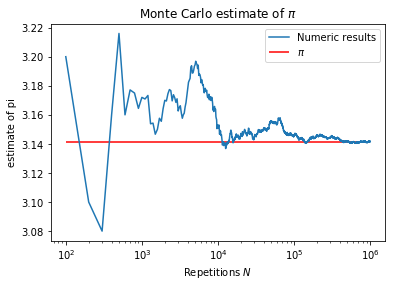

In [5]:
figure()
xscale('log')
title('Monte Carlo estimate of $\pi$')
xlabel('Repetitions $N$')
ylabel('estimate of pi')
plot(range(n_step,n_iter,n_step),np.abs(data_PI_estimate),label ='Numeric results')
hlines(np.pi, n_step,n_iter,colors ='r',label = r'$\pi$')
legend()
show()

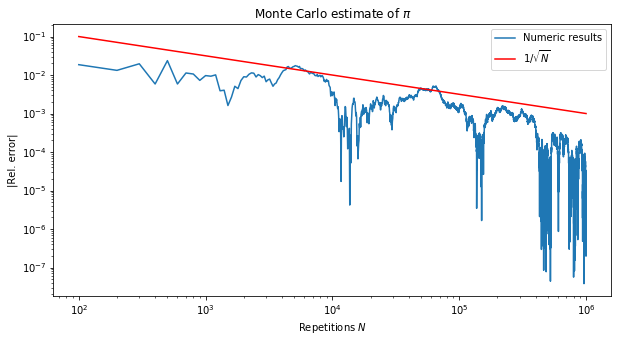

In [6]:
# Analysis
#%matplotlib inline 
plt.rcParams['figure.figsize'] = [10, 5]
figure()
xscale('log')
yscale('log')
title('Monte Carlo estimate of $\pi$')
xlabel('Repetitions $N$')
ylabel('|Rel. error|')
x=range(n_step,n_iter,n_step)
plot(x,np.abs(data_PI_error),label ='Numeric results')
plot(x,1/np.sqrt(x),c ='r', label = r'$1/\sqrt{N}$')
legend()
show()


## Conclusions
Observation: The accuracy of the approximation increases as a power law in the number of repetitions $(1/sqrt(N))$.
For 10000000 iterations, we can calculate PI to a rel. precision of approx. 0.013107184272892793 %.

# Calculate volume

In [7]:
#function be to be integrated
def function(x,y):
    return x**2-y**3*x*y**2

In [8]:
class MC_integrator:
    def __init__(self, xmin_, xmax_, ymin_, ymax_, N_, funktion_):
        self.xmin = xmin_       # boundaries
        self.xmax = xmax_
        self.ymin = ymin_
        self.ymax = ymax_
        self.V = (xmax_ - xmin_)*(ymax_ - ymin_)
        self.N = N_             # number random points 
        self.f = funktion_      # function to be integrated 
    
    def integral(self):   
        #random.random(size=None)
        #Return random floats in the half-open interval [0.0, 1.0). 
        #Alias for random_sample to ease forward-porting to the new random API.
        self.random_x = np.random.random(self.N)*(self.xmax - self.xmin) + self.xmin
        self.random_y = np.random.random(self.N)*(self.ymax - self.ymin) + self.ymin
        return (self.V/self.N)*np.sum(self.f(self.random_x, self.random_y))

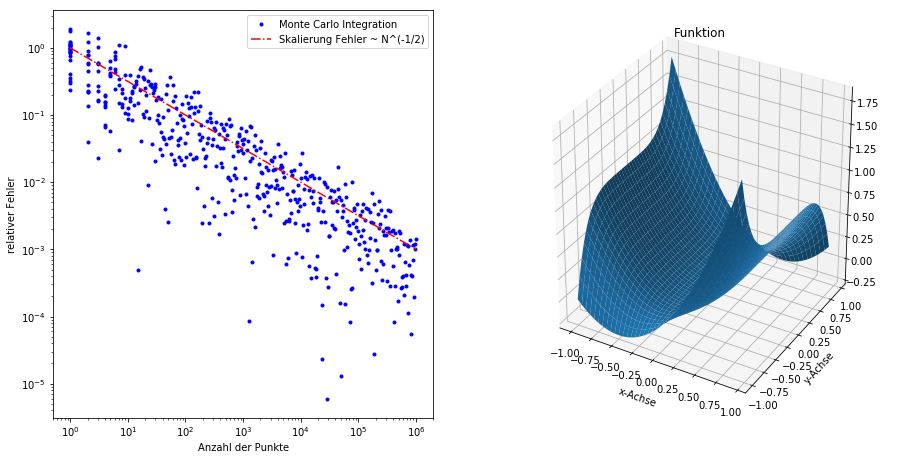

In [11]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy import integrate
%matplotlib inline
x_min = -1
x_max = 1
y_min = -1
y_max = 1
anzahl = 500
# Array mit Anzahl Stuetzstellen, generiert verschiedene 'anzahl' an 
# zufällig ausgwählten Punkten für MC-Integration, für Fehlerdiagramm
Punkte = np.int32(10**np.linspace(0, 6, anzahl))
analy = 4/3                        # analytischer Integralwert
rela_fehl = np.zeros(len(Punkte))  # Array für relativen Fehler der Methode

scalierung = Punkte**(-1/2)        # Skalierungsverhalten relativer Fehler 
X = np.arange(x_min ,x_max, 0.05)
Y = np.arange(y_min, y_max, 0.05)
X,Y = np.meshgrid(X, Y)
Z = function(X, Y)

# Fehlerdiagramm
fig = plt.figure(figsize = (15,7.5))
ax1 = fig.add_subplot(1, 2, 1, xscale = 'log', yscale = 'log')        
ax1.set_xlabel("Anzahl der Punkte")                        
ax1.set_ylabel("relativer Fehler") 
# 3D darstellung der Funktion
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_title("Funktion") 
ax2.set_xlabel("x-Achse")                           
ax2.set_ylabel("y-Achse")
ax2.plot_surface(X, Y, Z)

# Darsetllung des Skalierungsverhaltens des relativen Fehlers, dazu 
# Berechnung des Integrals mit 'anzahl' verschiedenen Zufallspunkten
for n in range(0, anzahl):        
    ergebnis = MC_integrator(x_min, x_max, y_min, y_max, 
                                       Punkte[n], function)         
    rela_fehl[n] = np.abs((ergebnis.integral() - analy)/analy)
ax1.plot(Punkte,rela_fehl,label = 'Monte Carlo Integration', color = 'b', 
         marker = '.', ls='none')
ax1.plot(Punkte,scalierung, color = 'r', ls = '-.',
         label = 'Skalierung Fehler ~ N^(-1/2)')
ax1.legend()
fig.show()

# Diskussion Effizienz Monte Carlo Verfahren
Das Monte-Carlo Integrationsverfahren ist besonders in höheren Dimensionen 
einer zu integrierenden Funktion effizient, da der Fehler nicht von der 
Dimension des Integrals abhängt, sondern mit mit Wurzel aus Anzahl gewählter 
Stützstellen skaliert, im Gegensatz zu regulären deterministischen Verfahren 
deren Fehler exponentiell mit der Raumdimension steigt. 
Also ist das MC Verfahren besonders in höheren Dimensionen effizient.

In höheren Raumdimensionen sind jedoch so gut wie alle Integranten stark lokalisiert und nur kleine Raumbereiche tragen zum Wert des Integrals bei. 
Hier ist eine spezifische Auswahl der Stützstellen notwendig, was eine Berechnung erschweren kann.